# Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import re

# data reading

In [2]:
train =pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('titanic train dataset has {} rows and {} columns.'.format(train.shape[0],train.shape[1]))

titanic train dataset has 891 rows and 12 columns.


In [4]:
for i in train.columns:
    if train[i].isnull().sum()>0:
        print(i,'has missing values of : ',train[i].isnull().sum())
    else:
        pass

Age has missing values of :  177
Cabin has missing values of :  687
Embarked has missing values of :  2


In [5]:
test=pd.read_csv("titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print('titanic test dataset has {} rows and {} columns.'.format(test.shape[0],test.shape[1]))

titanic test dataset has 418 rows and 11 columns.


In [7]:
train.columns.difference(test.columns)[0]

'Survived'

# EDA

In [8]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
round(train.Pclass.value_counts(normalize=True)*100,2)

3    55.11
1    24.24
2    20.65
Name: Pclass, dtype: float64

In [10]:
round(train.Survived.value_counts(normalize=True)*100,2)

0    61.62
1    38.38
Name: Survived, dtype: float64

In [11]:
round(train.Sex.value_counts(normalize=True)*100,2)

male      64.76
female    35.24
Name: Sex, dtype: float64

In [12]:
train.groupby(['Survived','Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [13]:
train.groupby(['Survived','Sex']).size().unstack()

Sex,female,male
Survived,,
0,81,468
1,233,109


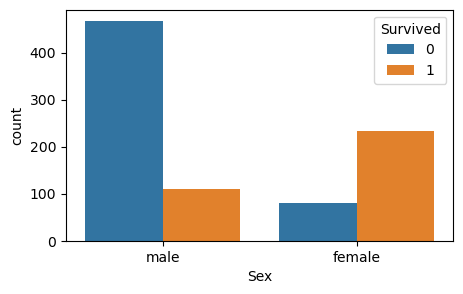

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(x='Sex', data=train,hue='Survived')
plt.show()

In [15]:
train.groupby(['Survived','Pclass']).size().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


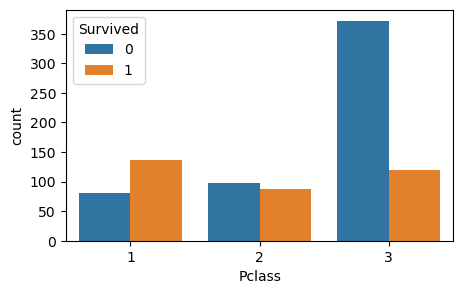

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x='Pclass', data=train,hue='Survived')
plt.show()

# missing value imputation

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.shape

(891, 12)

In [19]:
train.drop(['Cabin'],axis=1,inplace=True)

In [20]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [21]:
train.shape

(891, 11)

In [22]:
mean_age = train['Age'].mean()
train['Age'].fillna(mean_age,inplace=True)

In [23]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [24]:
train['Embarked'].mode()[0]

'S'

In [25]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [26]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
test.columns.difference(train.columns)

Index(['Cabin'], dtype='object')

In [29]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
test.drop(['Cabin'],axis=1,inplace=True)

In [31]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [33]:
len(train.columns)

11

In [34]:
len(test.columns)

10

In [35]:
print(test.columns.difference(train.columns))
print(train.columns.difference(test.columns))

Index([], dtype='object')
Index(['Survived'], dtype='object')


In [36]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

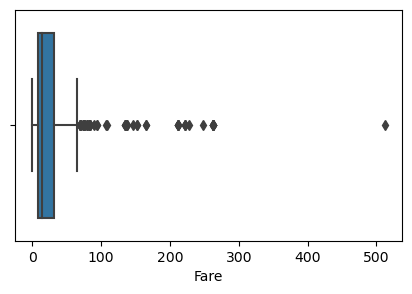

In [37]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Fare',data=test)
plt.show()

Above graph is showing there are lots of outliers in Fare attribute, so we have to go through median instead of mean for missing value imputation.

In [38]:
test['Age'].fillna(test['Age'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [39]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# feature engineering

In [40]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [41]:
all_data = [train,test]

In [42]:
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)       

In [43]:
dataset['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [44]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [45]:
dataset['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [46]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [47]:
dataset.shape

(418, 11)

In [48]:
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])


In [49]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,Elder
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,Elder
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,Adult


In [50]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [51]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,Adult,Low_fare
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,Elder,Low_fare
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,Elder,median_fare
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,Adult,median_fare
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,Adult,median_fare


In [52]:
dataset.shape

(418, 13)

In [53]:
traindf=train
testdf=test

In [54]:
all_dat=[traindf,testdf]

In [55]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [56]:
dataset.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title',
       'Age_bin', 'Fare_bin'],
      dtype='object')

In [57]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked', 'Title', 'Age_bin', 'Fare_bin'],
      dtype='object')

In [58]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked', 'Title', 'Age_bin', 'Fare_bin'],
      dtype='object')

In [59]:
traindf.drop(['PassengerId'],axis=1,inplace=True)

In [60]:
traindf

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_bin,Fare_bin
0,0,3,male,1,0,S,Mr,Adult,Low_fare
1,1,1,female,1,0,C,Mrs,Adult,high_fare
2,1,3,female,0,0,S,Miss,Adult,median_fare
3,1,1,female,1,0,S,Mrs,Adult,high_fare
4,0,3,male,0,0,S,Mr,Adult,median_fare
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Rare,Adult,median_fare
887,1,1,female,0,0,S,Miss,Teenage,Average_fare
888,0,3,female,1,2,S,Miss,Adult,Average_fare
889,1,1,male,0,0,C,Mr,Adult,Average_fare


In [61]:
testdf

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_bin,Fare_bin
0,892,3,male,0,0,Q,Mr,Adult,Low_fare
1,893,3,female,1,0,S,Mrs,Elder,Low_fare
2,894,2,male,0,0,Q,Mr,Elder,median_fare
3,895,3,male,0,0,S,Mr,Adult,median_fare
4,896,3,female,1,1,S,Mrs,Adult,median_fare
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0,0,S,Mr,Adult,median_fare
414,1306,1,female,0,0,C,Rare,Adult,high_fare
415,1307,3,male,0,0,S,Mr,Adult,Low_fare
416,1308,3,male,0,0,S,Mr,Adult,median_fare


# converting categorical variables into numerical

In [62]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [63]:
traindf

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,1,3,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
887,1,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
888,0,3,1,2,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
889,1,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [64]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [65]:
testdf

,PassengerId,Pclass,SibSp,Parch,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
414,1306,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
415,1307,3,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
416,1308,3,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


# Checking co-relation

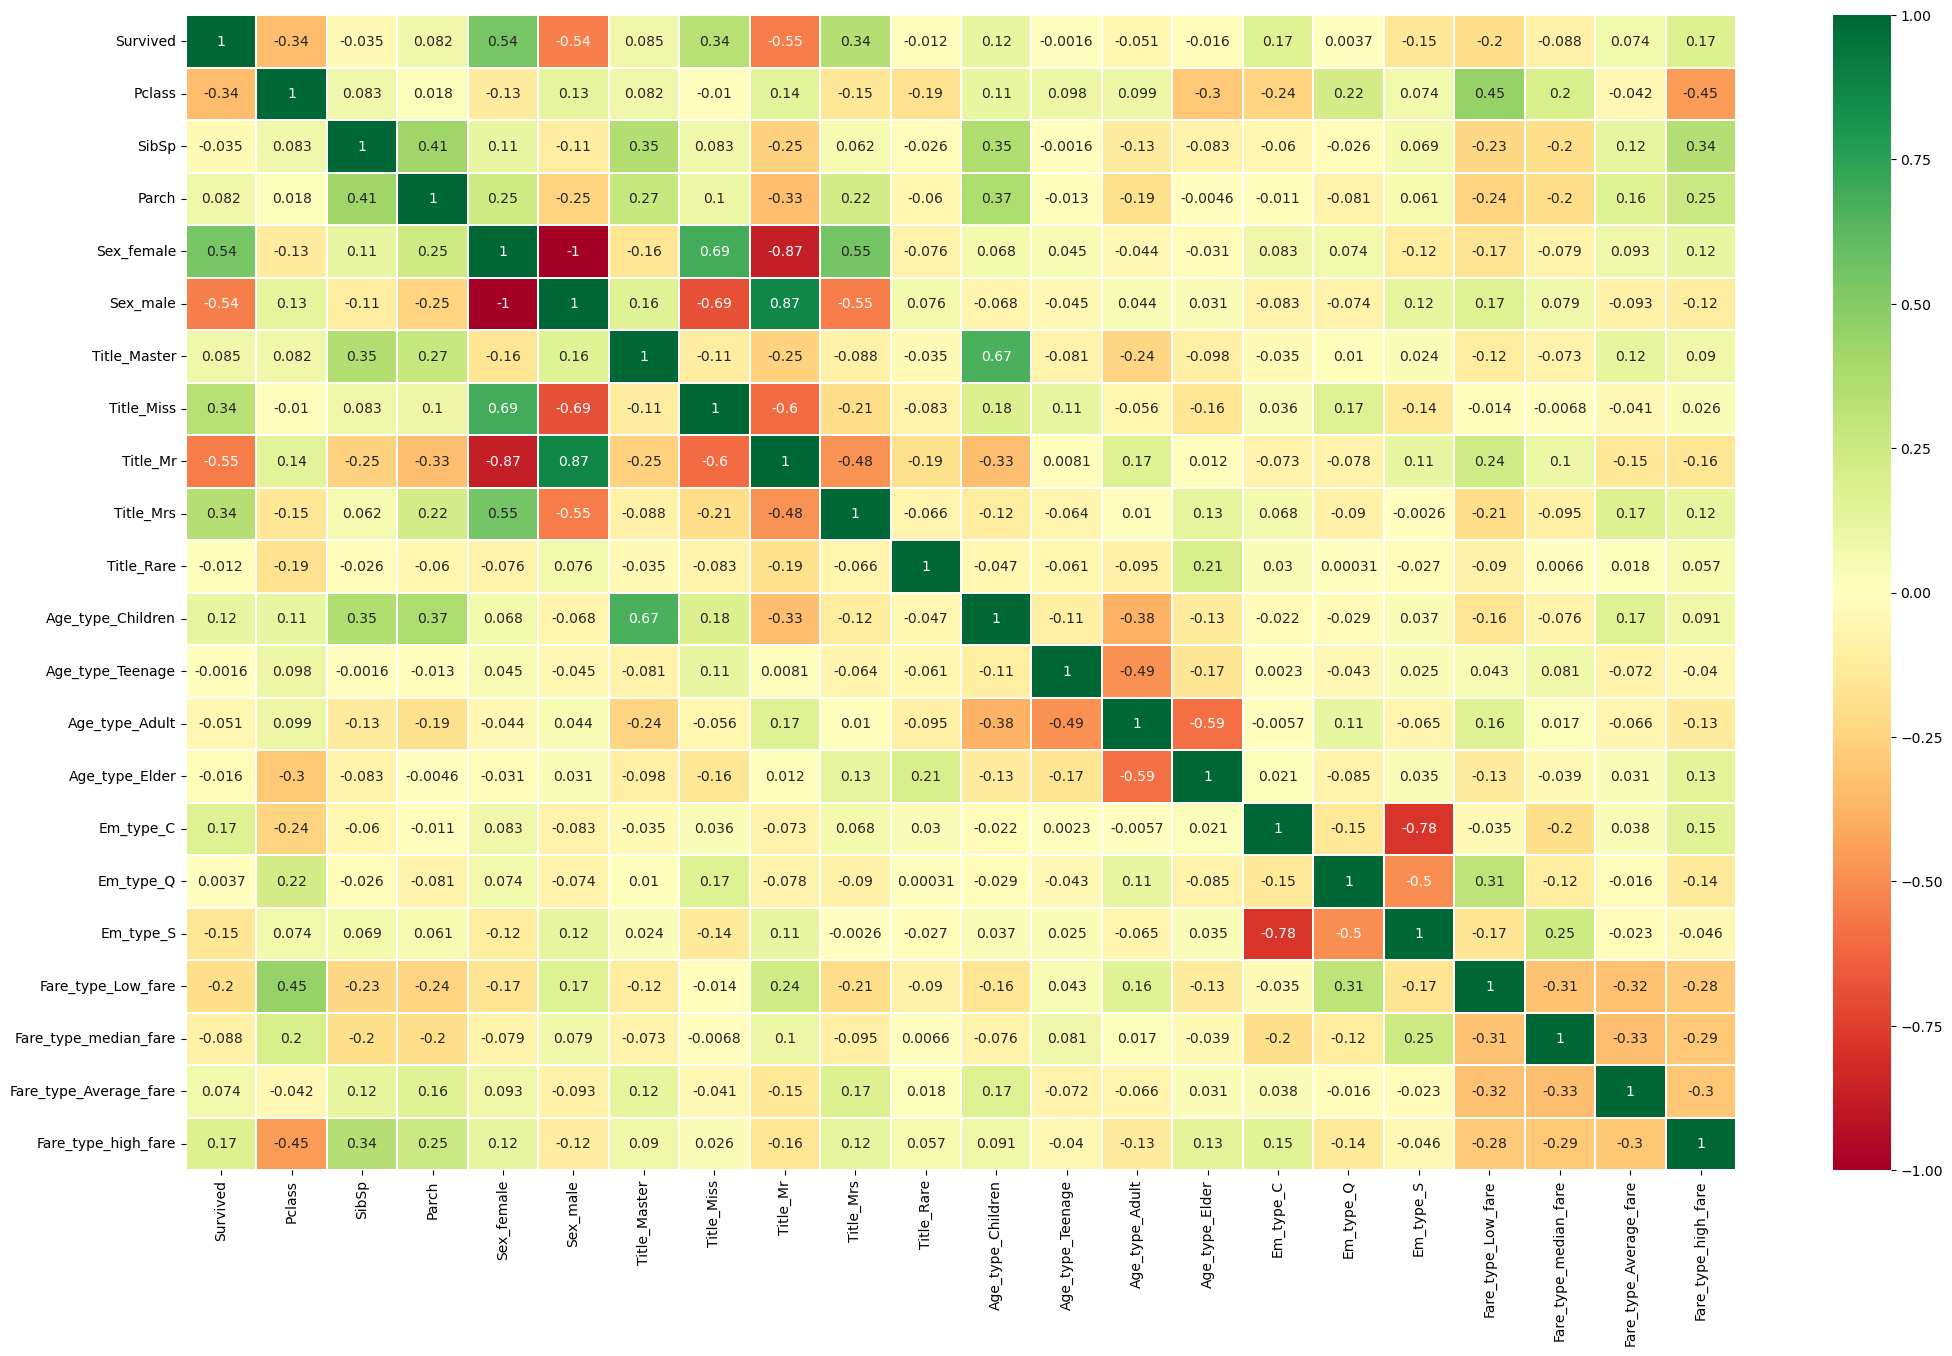

In [66]:
plt.figure(figsize=(25,15))
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
plt.show()

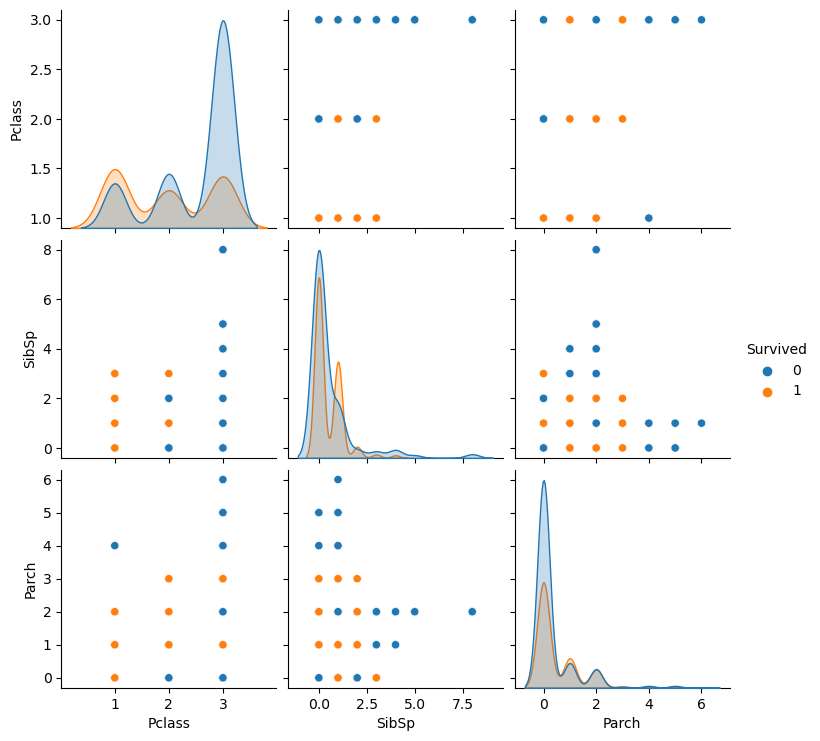

In [67]:
sns.pairplot(data=train,hue='Survived')
plt.show()

# Train Test Split

In [68]:
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import accuracy_score  
#from sklearn.model_selection import KFold 
#from sklearn.model_selection import cross_val_score 
#from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 

In [69]:
X = traindf.drop("Survived",axis=1)
y = traindf["Survived"]

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [71]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 21), (268, 21), (623,), (268,))

# Model Building

In [72]:
from sklearn.svm import SVC

In [73]:
model=SVC()
param_grid={'C':[1.0,1.5,2.0], 'kernel':['rbf','sigmoid','poly'], 'gamma': [1.0,0.1,0.0]}
search=GridSearchCV(model,param_grid,cv=5)
search.fit(X_train,y_train)
print(search.best_params_)

{'C': 1.5, 'gamma': 0.1, 'kernel': 'rbf'}


In [74]:
mod=SVC(kernel='rbf',C=2,gamma=0.1)
mod.fit(X_train,y_train)

SVC(C=2, gamma=0.1)

In [75]:
preds_train=mod.predict(X_train)

In [76]:
preds_test=mod.predict(X_test)

In [77]:
confusion_matrix(y_train,preds_train)

array([[354,  30],
       [ 64, 175]], dtype=int64)

In [78]:
confusion_matrix(y_test,preds_test)

array([[146,  19],
       [ 26,  77]], dtype=int64)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       384
           1       0.85      0.73      0.79       239

    accuracy                           0.85       623
   macro avg       0.85      0.83      0.84       623
weighted avg       0.85      0.85      0.85       623



In [81]:
print(classification_report(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       165
           1       0.80      0.75      0.77       103

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [82]:
# This is to get the Models Accuracy 
from sklearn.metrics import accuracy_score 
ac_test = accuracy_score(y_test,preds_test)
print('test accuracy is: ',ac_test) 
ac_train = accuracy_score(y_train,preds_train)
print('train accuracy is: ',ac_train) 

test accuracy is:  0.832089552238806
train accuracy is:  0.8491171749598716


# Apply this model on unseen test data.

In [83]:
traindf.columns.difference(testdf.columns)

Index(['Survived'], dtype='object')

In [84]:
testdf.columns.difference(traindf.columns)

Index(['PassengerId'], dtype='object')

In [85]:
test_new = testdf.drop(['PassengerId'],axis=1)
test_new

,Pclass,SibSp,Parch,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1,3,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
2,2,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,3,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,3,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
414,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
415,3,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
416,3,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [86]:
mod.predict(test_new)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
titanic_test['survibe_prediction']=mod.predict(test_new)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survibe_prediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [89]:
mapping = {1: 'Yes', 0: 'No'}
titanic_test['survibe_prediction'] = titanic_test['survibe_prediction'].map(mapping)

In [90]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survibe_prediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,No
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Yes
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,No
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,No
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Yes


In [91]:
titanic_test.to_csv('titanic_final_report.csv')